In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [8]:
def ShowImage(img):
    plt.axis("off")
    plt.imshow(img, cmap='gray')
    plt.show()

In [9]:
def rotate_image(img, ang):
    angle = math.radians(ang)   
    cosx = math.cos(angle)
    sinx = math.sin(angle)
    r,c = img.shape
    shift = (int(c/2),int(r/2)) 
    out = np.zeros_like(img, dtype='u1') 
    T = np.float32([[1, 0, -shift[0]], [0, 1, -shift[1]]])
    Tr = np.float32([[1, 0, shift[0]], [0, 1,  shift[1]]])
    R = np.array([[cosx,-sinx, 0],[sinx, cosx, 0]])
    for i in range(r):
        for j in range(c):
            x = j
            y = i
            xy = np.array([x, y, 1])
            new_xy = np.dot(T, xy)  
            xy = np.array([int(new_xy[0]), int(new_xy[1]), 1])
            new_xy = np.dot(R, xy)  
            xy = np.array([int(new_xy[0]), int(new_xy[1]), 1])
            new_xy = np.dot(Tr, xy)  
            xn = int(new_xy[0])
            yn = int(new_xy[1])
            if 0 <= xn < c and 0 <= yn < r:
                out[yn,xn] = img[y,x]
    return out.astype(np.uint8)


In [10]:
img = cv2.imread("./images/cameraman.png", 0)

In [11]:
ang = 45      # (sx,sy)
rot_img = rotate_image(img, -ang)

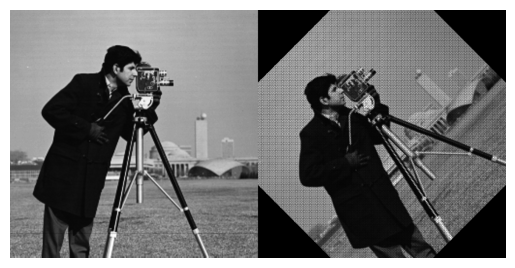

In [12]:
mul_img = cv2.hconcat([img, rot_img])
ShowImage(mul_img)